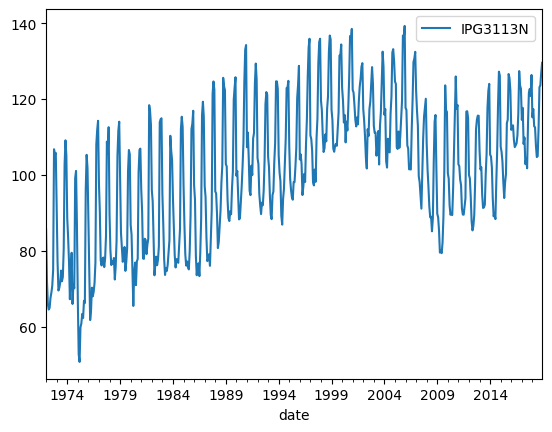

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


# Load in the time series
candy = pd.read_csv('candy_production.csv', 
                 index_col='date', 
                 parse_dates=True)

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1)
plt.show()

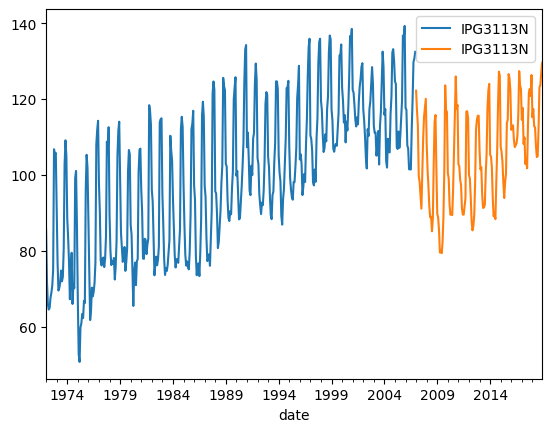

In [2]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

In [3]:
earthquake = pd.read_csv('.//earthquakes.csv', usecols=['date', 'earthquakes_per_year'], parse_dates=['date'])
display(earthquake.head())

,date,earthquakes_per_year
0,1900-01-01,13.0
1,1901-01-01,14.0
2,1902-01-01,8.0
3,1903-01-01,10.0
4,1904-01-01,16.0


In [4]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.183192251191782
0.02097842525600371
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


In [6]:
city = pd.read_csv('.//city.csv', parse_dates=['date'], index_col=['date'])
city.info()
city.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1969-09-30 to 2019-03-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_population  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


,city_population
date,
1969-09-30,1.000000
1970-03-31,0.960285
1970-09-30,0.957167
1971-03-31,0.946928
1971-09-30,0.987741


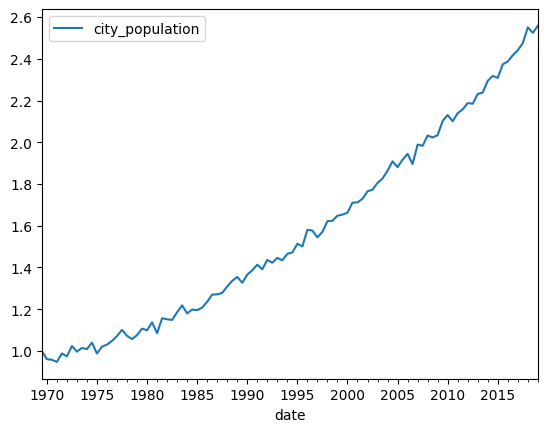

ADF Statistic: 5.297698878151179
p-value: 1.0


In [7]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

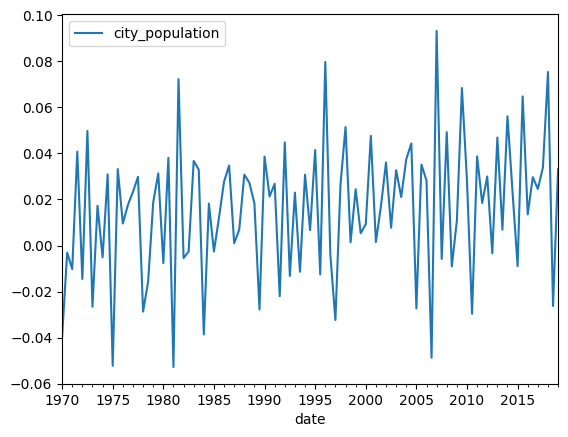

ADF Statistic: -0.8146211646182078
p-value: 0.8147894381484792


In [8]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

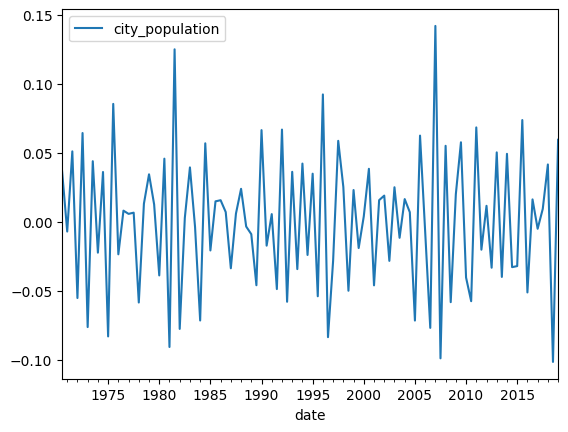

ADF Statistic: -6.433646032918707
p-value: 1.6734498510403528e-08


In [9]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

In [10]:
amazon = pd.read_csv('.//amazon_close.csv', index_col='date', parse_dates=True)
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


In [11]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.203579488811235, 2.331271725487306e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


In [13]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)
import numpy as np

# Calculate log-return and drop nans
amazon_log = np.log(amazon.div(amazon.shift(1)))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.203579488811235, 2.331271725487306e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)
(-34.91574853605969, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


- Set **ar_coefs** and **ma_coefs** for an MA(1) model with MA lag-1 coefficient of -0.7.
- Generate a time series of 100 values.
- Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.
- Set the coefficients for a model with form $ y_t = -0.2 y_{t-1} + 0.3 \epsilon_{t-1} + 0.4 \epsilon_{t-2} + \epsilon_{t}$

Hint
Remember that the lag-i AR coefficient is used to multiply 
. The lag-j MA coefficient is used to multiply 
.
Don't forget to set the lag-0 coefficients to 1.
Remember that for lags greater than zero, you need to pass the negative of the desired AR coefficient into the arma_generate_sample() function.

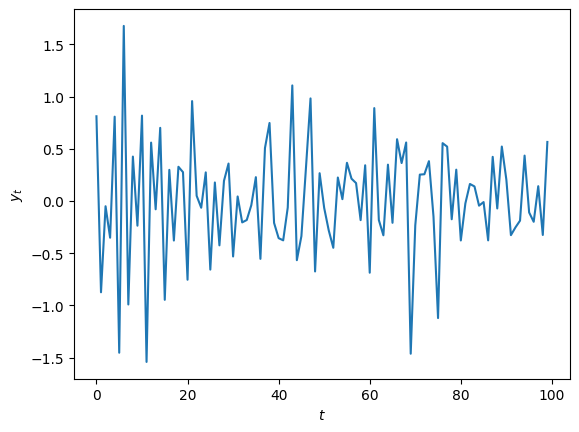

In [14]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

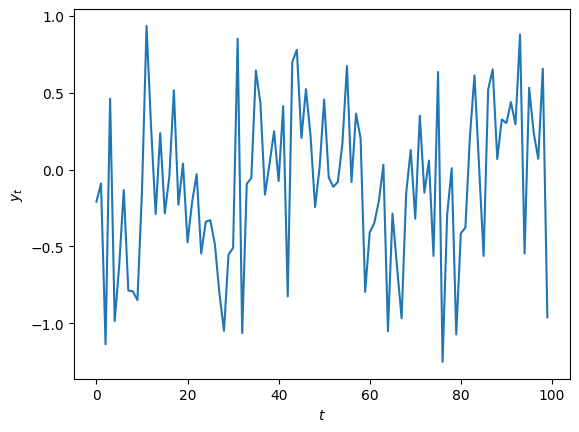

In [15]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

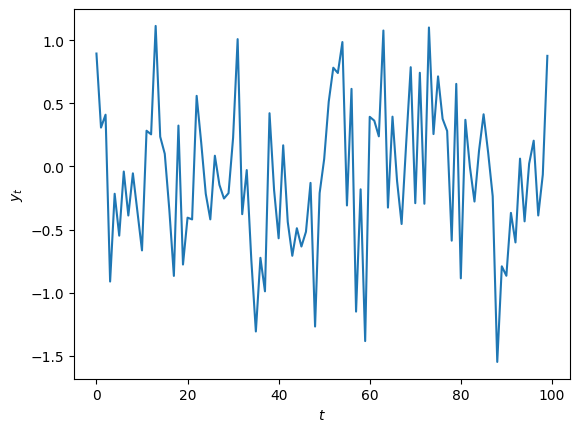

In [16]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

In [17]:
# Import the ARMA model
from statsmodels.tsa.arima.model import ARIMA

# Instantiate the model
model = ARIMA(y, order=(1, 0,1))

# Fit the model
results = model.fit()